In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# 載入檔案
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# 資料清理
# 使用LabelEncoder將標籤轉為對應數值
lb = LabelEncoder()

lb.fit(df['CarName'].drop_duplicates()) 
df['CarName'] = lb.transform(df['CarName'])

lb.fit(df['fueltype'].drop_duplicates()) 
df['fueltype'] = lb.transform(df['fueltype'])

lb.fit(df['aspiration'].drop_duplicates()) 
df['aspiration'] = lb.transform(df['aspiration'])

lb.fit(df['doornumber'].drop_duplicates()) 
df['doornumber'] = lb.transform(df['doornumber'])

lb.fit(df['carbody'].drop_duplicates()) 
df['carbody'] = lb.transform(df['carbody'])

lb.fit(df['drivewheel'].drop_duplicates()) 
df['drivewheel'] = lb.transform(df['drivewheel'])

lb.fit(df['enginelocation'].drop_duplicates()) 
df['enginelocation'] = lb.transform(df['enginelocation'])

lb.fit(df['enginetype'].drop_duplicates()) 
df['enginetype'] = lb.transform(df['enginetype'])

lb.fit(df['cylindernumber'].drop_duplicates()) 
df['cylindernumber'] = lb.transform(df['cylindernumber'])

lb.fit(df['fuelsystem'].drop_duplicates()) 
df['fuelsystem'] = lb.transform(df['fuelsystem'])

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


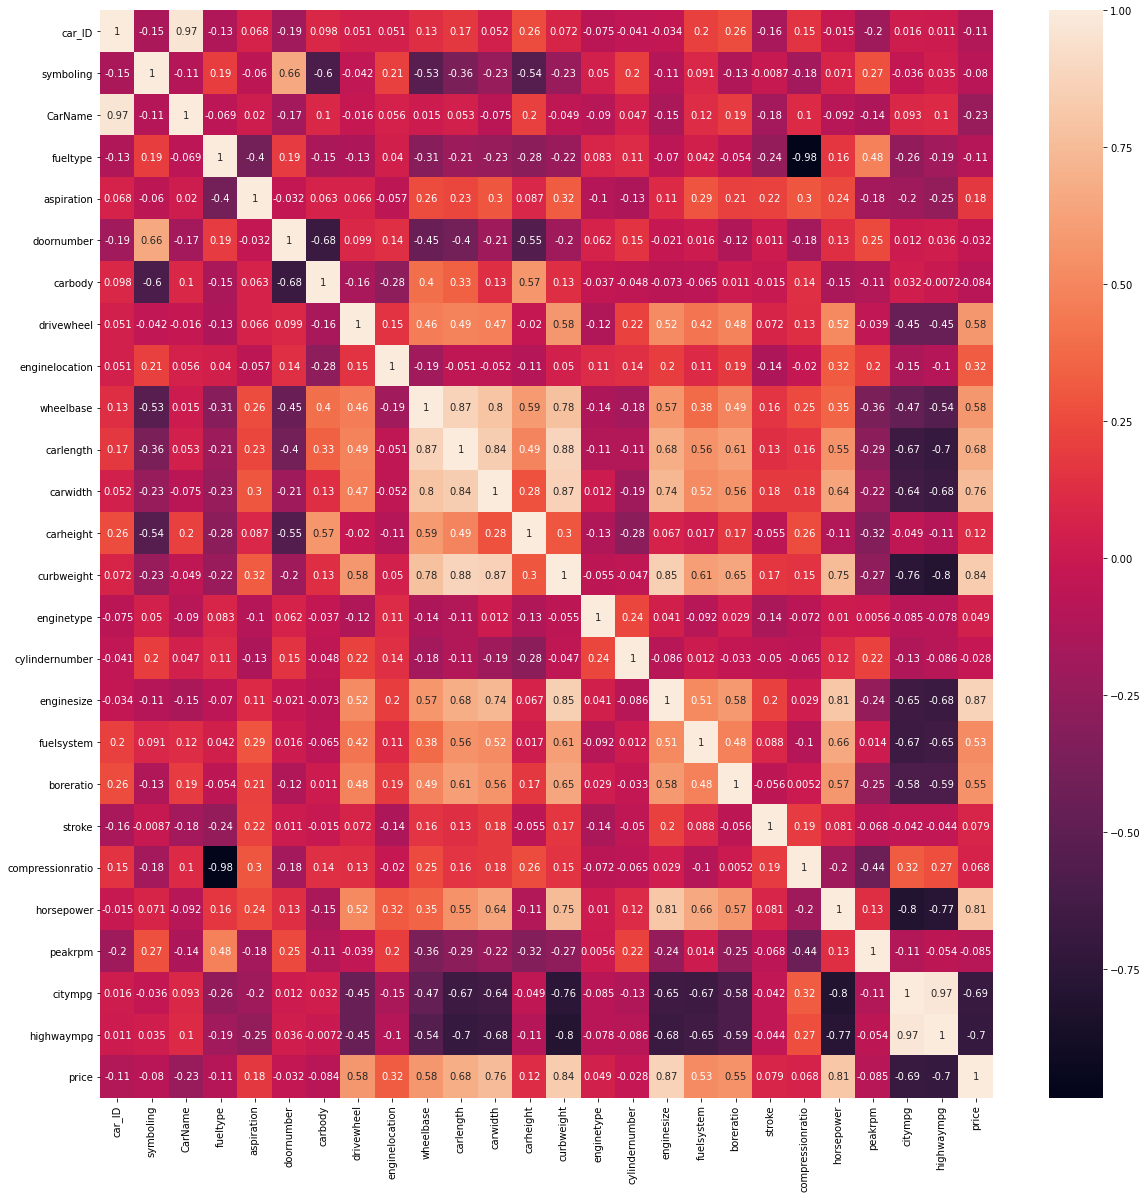

In [6]:
# 相關係數
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [7]:
# 選擇需要欄位
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 切分資料為 訓練8:測試2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#線性回歸

# 載入模型
ln = LinearRegression()
ln.fit(X_train, y_train)

# 預測
ln_predict = ln.predict(X_test)

# 模型效能指標
ln_mse = mean_squared_error(y_test, ln_predict, squared=False)  #計算 MSE
ln_r2 = r2_score(y_test, ln_predict)     # 數值越大代表模型預測效果越佳，通常為 1或 0

print("ln_mse={}".format(ln_mse))
print("ln_r2={}".format(ln_r2))

ln_mse=3508.0081674554954
ln_r2=0.8441158536668163


In [9]:
#隨機森林

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

rfr_predict = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_predict, squared=False)
rfr_r2 = r2_score(y_test, rfr_predict)

print("rfr_mse={}".format(rfr_mse))
print("rfr_r2={}".format(rfr_r2))

rfr_mse=1838.6570000507727
rfr_r2=0.9571764963810345


In [10]:
X_train.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance


  

model = RandomForestClassifier(random_state=0).fit(X_train, y_train.astype('int'))
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test.astype('int'))


eli5.show_weights(perm, feature_names=X_test.columns.tolist())

C:\Users\a0952\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\a0952\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0585 ± 0.0239,carlength
0.0244 ± 0.0000,enginetype
0.0244 ± 0.0000,curbweight
0.0195 ± 0.0195,fuelsystem
0.0146 ± 0.0239,horsepower
0.0146 ± 0.0239,stroke
0.0146 ± 0.0239,enginesize
0.0146 ± 0.0239,carheight
0.0098 ± 0.0239,CarName
0.0098 ± 0.0239,carbody


[Text(558.0, 475.65000000000003, 'enginesize <= 182.0\nmse = 50990231.299\nsamples = 109\nvalue = 12284.064'),
 Text(279.0, 339.75, 'curbweight <= 2697.5\nmse = 18631200.457\nsamples = 102\nvalue = 10733.608'),
 Text(139.5, 203.85000000000002, 'car_ID <= 16.0\nmse = 6601345.763\nsamples = 78\nvalue = 8885.871'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'fuelsystem <= 5.5\nmse = 12084897.439\nsamples = 24\nvalue = 16526.514'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'enginesize <= 206.0\nmse = 2570640.682\nsamples = 7\nvalue = 33849.5'),
 Text(697.5, 203.85000000000002, 'wheelbase <= 93.95\nmse = 1080626.701\nsamples = 4\nvalue = 32685.417'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'CarName <= 16.0\nmse = 781219.84\nsamp

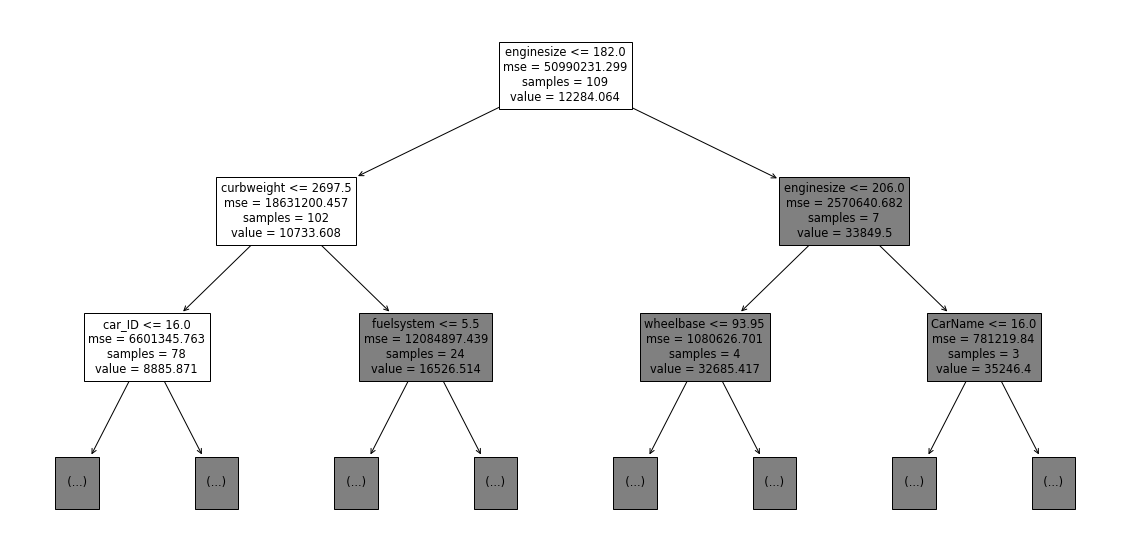

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(rfr.estimators_[0], max_depth=2, ax=ax, feature_names=X_train.columns)

In [13]:
#ANN

ann = MLPRegressor(batch_size=10 ,learning_rate_init=1e-1 ,random_state=42)
ann.fit(X_train, y_train)

ann_predict = ann.predict(X_test)
ann_mse = mean_squared_error(y_test, ann_predict, squared=False)
ann_r2 = r2_score(y_test, ann_predict)

print("ann_mse={}".format(ann_mse))
print("ann_r2={}".format(ann_r2))

ann_mse=3374.784205647878
ann_r2=0.8557310825090599
